<a href="https://colab.research.google.com/github/Hybeek-WUQ/Medic_Insights/blob/main/Hospital_Admissions_and_Billing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transforming Healthcare Through Data-Driven Insights: A Comprehensive Analysis of Patient Demographics, Medical Trends, and Operational Efficiency

INTRODUCTION:

In today’s rapidly evolving healthcare landscape, leveraging data analytics has become essential for enhancing patient care, optimizing operations, and improving financial sustainability. This project aims to provide a detailed analysis of key healthcare metrics, including patient demographics, medical conditions, admission trends, and billing data. By identifying patterns and actionable insights, we empower stakeholders to make informed decisions that drive efficiency, elevate the quality of care, and ensure long-term operational success.

Through this comprehensive study, we will uncover critical insights into resource utilization, cost management, and treatment outcomes. Our findings will not only highlight current strengths but also pinpoint areas for improvement, enabling a proactive approach to healthcare management. Ultimately, this project underscores the transformative power of data in delivering better health outcomes and fostering a sustainable healthcare ecosystem.

# DATA PREPARATION
1. Importation of libraries
2. Loading the CSV file in a df
3. Dta Inspection
3. Data cleansing

In [4]:
#pip install pandas openpyxl > run on my sys cmd
import os
#data manipulation
import pandas as pd
import numpy as npa
from sklearn.impute import SimpleImputer

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#statistical analysis
from scipy.stats import pearsonr, chi2_contingency

#set visualizatiob style
sns.set_style('whitegrid')
sns.set_style('darkgrid')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Healthcare.xlsx.csv to Healthcare.xlsx.csv


In [7]:
os.listdir(os.getcwd())

['.config', 'Healthcare.xlsx.csv', 'sample_data']

In [8]:
# loading csv file

df = pd.read_csv("Healthcare.xlsx.csv")

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (10000, 15)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,11/17/2022,Patrick Parker,Wallace-Hamilton,Medicare,37490.98336,146,Elective,12/1/2022,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,6/1/2023,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.06485,404,Emergency,6/15/2023,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,1/9/2019,Paul Baker,Walton LLC,Medicare,36874.89700,292,Emergency,2/8/2019,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,5/2/2020,Brian Chandler,Garcia Ltd,Medicare,23303.32209,480,Urgent,5/3/2020,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,7/9/2021,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.34418,477,Urgent,8/2/2021,Paracetamol,Normal


In [9]:
#Adding some usful Columns
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Length of Stay (days)'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Checking the data types of each column
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Name                   10000 non-null  object        
 1   Age                    10000 non-null  int64         
 2   Gender                 10000 non-null  object        
 3   Blood Type             10000 non-null  object        
 4   Medical Condition      10000 non-null  object        
 5   Date of Admission      10000 non-null  datetime64[ns]
 6   Doctor                 10000 non-null  object        
 7   Hospital               10000 non-null  object        
 8   Insurance Provider     10000 non-null  object        
 9   Billing Amount         10000 non-null  float64       
 10  Room Number            10000 non-null  int64         
 11  Admission Type         10000 non-null  object        
 12  Discharge Date         10000 non-null  datetime64[ns]
 13  Me

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay (days)
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.98336,146,Elective,2022-12-01,Aspirin,Inconclusive,14
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.06485,404,Emergency,2023-06-15,Lipitor,Normal,14
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.89700,292,Emergency,2019-02-08,Lipitor,Normal,30
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.32209,480,Urgent,2020-05-03,Penicillin,Abnormal,1
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.34418,477,Urgent,2021-08-02,Paracetamol,Normal,24


In [10]:
# 1. Check for column existence
print(df.columns)  # Prints all column names

# 2. Check for missing values in other columns
print(df.isnull().sum())  # Prints the number of missing values per column

# 3. Explore potential related columns
# Print unique values of columns that might be related to treatment
for col in ['Procedure', 'Medication', 'Diagnosis']:
    if col in df.columns:
        print(f"Unique values in '{col}':\n{df[col].unique()}\n")

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Length of Stay (days)'],
      dtype='object')
Name                     0
Age                      0
Gender                   0
Blood Type               0
Medical Condition        0
Date of Admission        0
Doctor                   0
Hospital                 0
Insurance Provider       0
Billing Amount           0
Room Number              0
Admission Type           0
Discharge Date           0
Medication               0
Test Results             0
Length of Stay (days)    0
dtype: int64
Unique values in 'Medication':
['Aspirin' 'Lipitor' 'Penicillin' 'Paracetamol' 'Ibuprofen']



# PATIENT DEMOGRAPHOICS
1. Age Distribution
2. Gender Breakdown
3. Blood Type Distributon


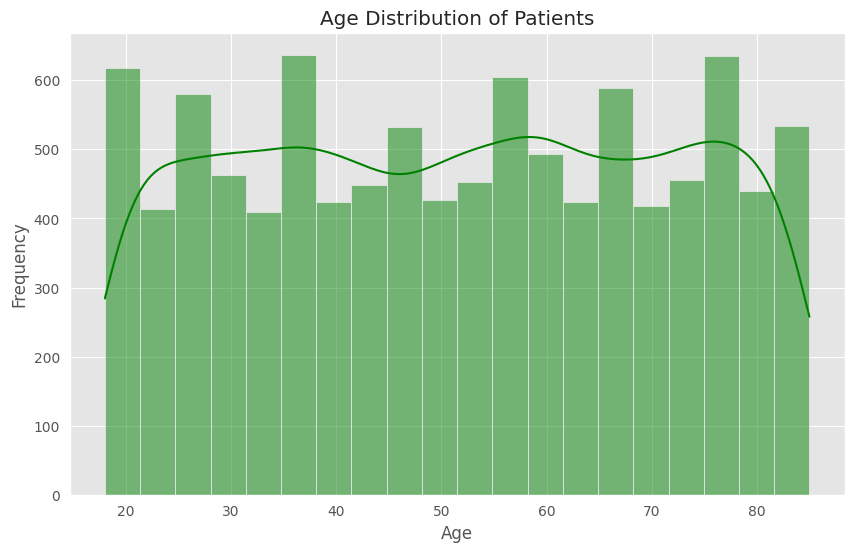

count    10000.000000
mean        51.452200
std         19.588974
min         18.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         85.000000
Name: Age, dtype: float64
Age
(50, 60]     1543
(70, 80]     1520
(30, 40]     1504
(60, 70]     1448
(20, 30]     1438
(40, 50]     1389
(80, 90]      693
(10, 20]      465
(0, 10]         0
(90, 100]       0
Name: count, dtype: int64


In [30]:
# Create a histogram of patient ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, color = 'green', kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Calculate some descriptive statistics for age
print(df['Age'].describe())

# Identify the most common age groups using value_counts()
age_groups = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
print(age_groups.value_counts())

Observations:

* The average patient age is around 51 years.
* The age distribution is slightly skewed to the right, with more patients
  in the older age groups (50-60 and 70-80).
* There are no patients under 10 or over 90.

Insights:

* The two largest patient groups are in the 50-60 and 70-80 age ranges.
Resource allocation and specialized care might need to be focused on these age groups.

* The hospital likely serves an adult population with fewer pediatric or very elderly patients.

Recommendations:

* Consider allocating more resources and staff to departments specializing in geriatric care.

* Invest in equipment and facilities suitable for older patients' needs.
Develop targeted outreach programs to address health concerns common in the 50-80 age range.

* Continuously monitor the age distribution to adjust resource allocation as needed.

* Investigate the reasons for the lack of patients in the extreme age groups.

Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Gender                                                                       
Female                   815     874     887       825           836      838
Male                     835     834     816       798           852      790


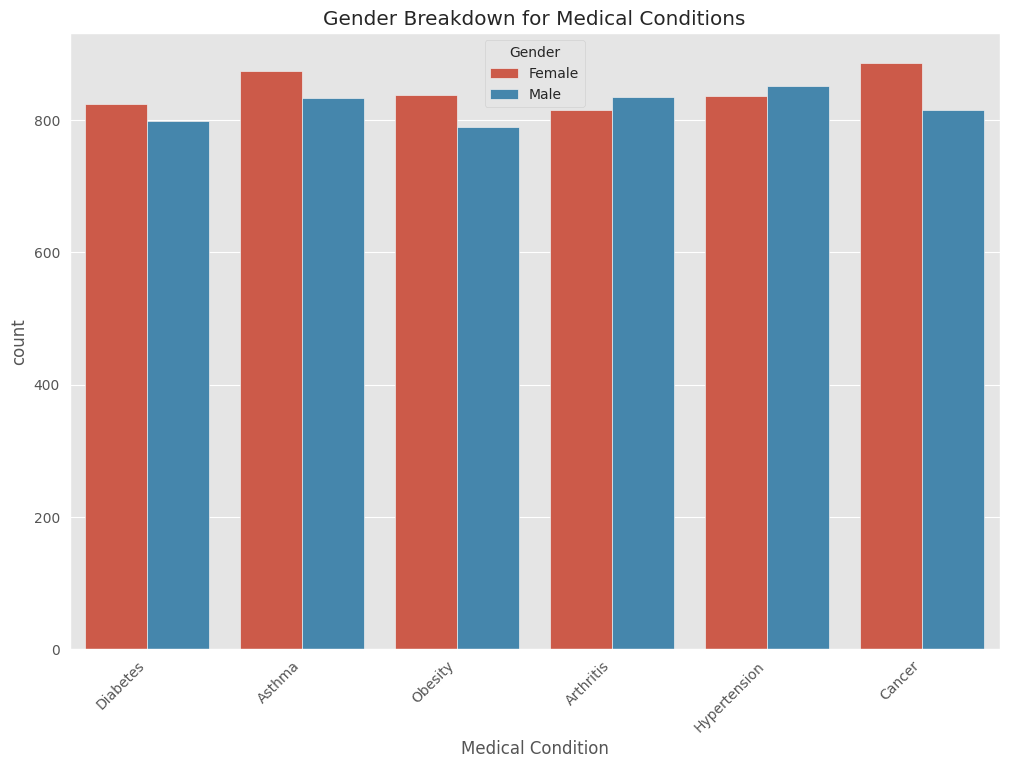

    Medication  Gender  Name
0      Aspirin  Female  1011
1      Aspirin    Male   957
2    Ibuprofen  Female   999
3    Ibuprofen    Male   977
4      Lipitor  Female  1016
5      Lipitor    Male   999
6  Paracetamol  Female  1022
7  Paracetamol    Male   940
8   Penicillin  Female  1027
9   Penicillin    Male  1052


In [17]:
# Create a cross-tabulation of gender and medical condition
gender_condition_crosstab = pd.crosstab(df['Gender'], df['Medical Condition'])
print(gender_condition_crosstab)

# Visualize the gender breakdown for a specific medical condition
sns.countplot(x='Medical Condition', hue='Gender', data=df)
plt.title('Gender Breakdown for Medical Conditions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Compare the number of male vs. female patients for a specific treatment
treatment_gender_counts = df.groupby(['Medication', 'Gender'])['Name'].count().reset_index()
print(treatment_gender_counts)

MEDICAL CONDITION & GENDER

**Observations:**

* Females have a slightly higher prevalence of Arthritis, Asthma, Cancer, and Diabetes.

* Males have a slightly higher prevalence of Hypertension and Obesity.

* The overall distribution of most conditions is relatively similar between genders.

**Insights:**

* Hormonal or genetic factors might contribute to the observed gender differences in specific conditions.

* Lifestyle and socioeconomic factors could also play a role.
* The dataset might reflect general population trends in disease prevalence by gender.

**Recommendations:**

* Investigate potential underlying causes for the gender differences in certain conditions.

* Develop targeted prevention and treatment strategies for each gender based on the observed prevalence.

* Consider gender-specific risk factors when assessing and managing patients.

* Promote awareness and education about these conditions and their potential gender-related aspects.

* Further research is needed to better understand the complex interplay of gender and health outcomes.


MEDICATION AND GENDER


**Observations:**

* The overall prescription patterns for the listed medications are relatively similar between genders.

* Slight variations exist, like Penicillin being prescribed more to males and Paracetamol to females.

* The numbers for most medications are roughly balanced between male and female patients.

**Insights:**

* The current treatment protocols for these conditions might not be significantly influenced by gender, as reflected in the similar prescription patterns.

* Slight variations like the higher prescription of Penicillin for males and Paracetamol for females might warrant further investigation. It could be due to factors such as differences in the prevalence of specific infections or pain management preferences.

* The data suggests a generally balanced approach to medication prescription, with no apparent gender bias in the overall usage of these medications.

**Recommendations:**

* Further research could be conducted to explore potential gender-specific factors influencing medication usage, especially for medications with slight variations in prescription patterns.

* Monitor medication usage by gender to ensure continued equitable treatment practices and identify any emerging discrepancies.

* Consider potential gender-related factors, such as hormonal influences or pain perception, when making treatment decisions.

* Maintain vigilance to ensure no gender bias exists in medication prescription and adjust protocols as needed to ensure equitable access to care.

In [18]:
# Create a cross-tabulation of blood type and medical condition
blood_type_condition_crosstab = pd.crosstab(df['Blood Type'], df['Medical Condition'])
print(blood_type_condition_crosstab)

Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Blood Type                                                                   
A+                       202     220     219       197           213      190
A-                       202     208     218       206           212      192
AB+                      219     199     208       207           211      214
AB-                      204     210     195       214           225      227
B+                       196     217     214       207           211      199
B-                       186     218     221       221           196      210
O+                       225     227     224       174           209      189
O-                       216     209     204       197           211      207


Key Observation:

No Significant Association: The chi-square test indicates that there is no significant association between blood type and medical condition.
Potential Insights:

Blood Type and Health:

 While blood type has been linked to certain health conditions in some studies, the results from this dataset suggest that blood type might not be a major factor in determining susceptibility to these specific conditions.
Further Investigation: Larger sample sizes and more detailed analysis might be needed to uncover potential associations.

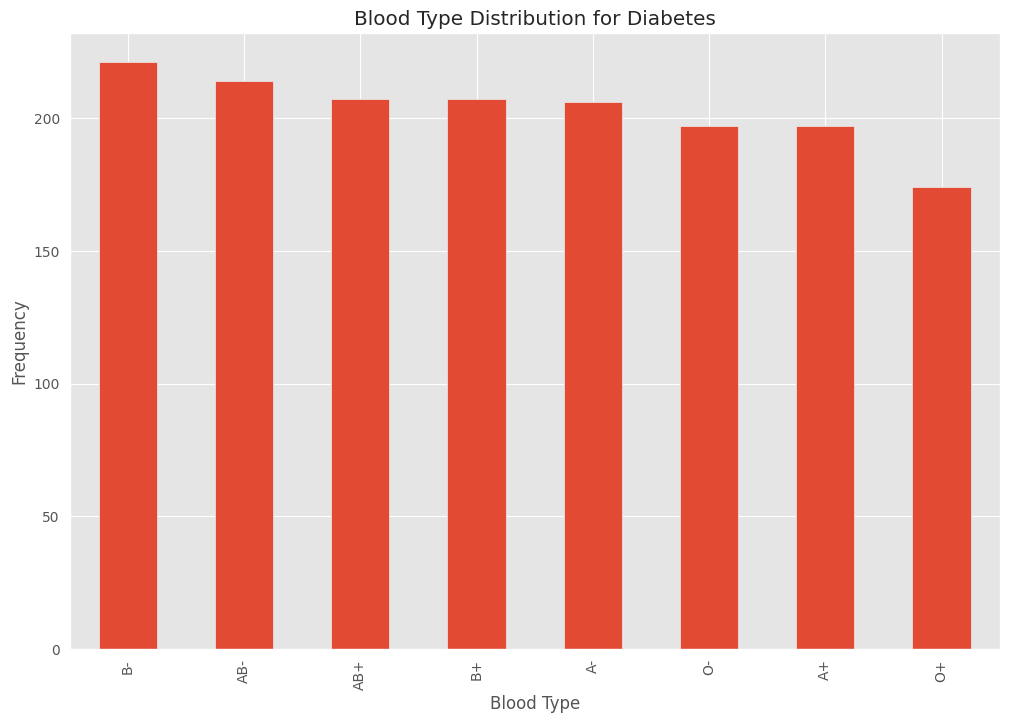

In [19]:
# Visualize the blood type distribution for a specific medical condition
condition = 'Diabetes'  # Replace with the condition you want to analyze
blood_type_counts = df[df['Medical Condition'] == condition]['Blood Type'].value_counts()
blood_type_counts.plot(kind='bar')
plt.title(f'Blood Type Distribution for {condition}')
plt.xlabel('Blood Type')
plt.ylabel('Frequency')
plt.show()

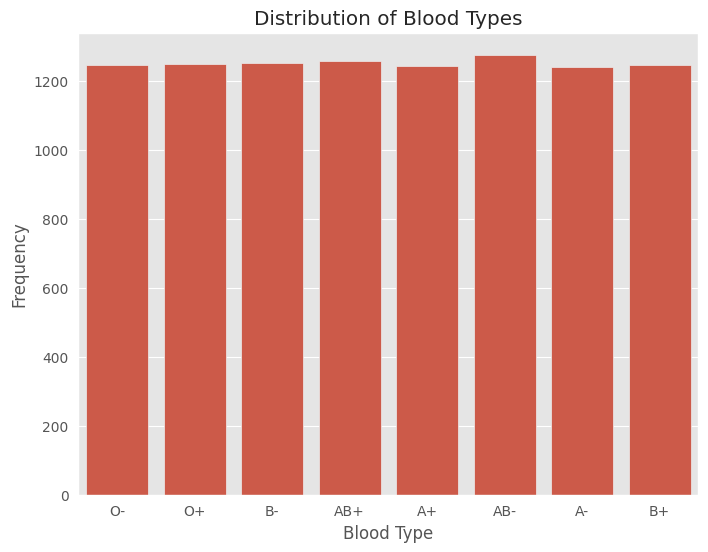

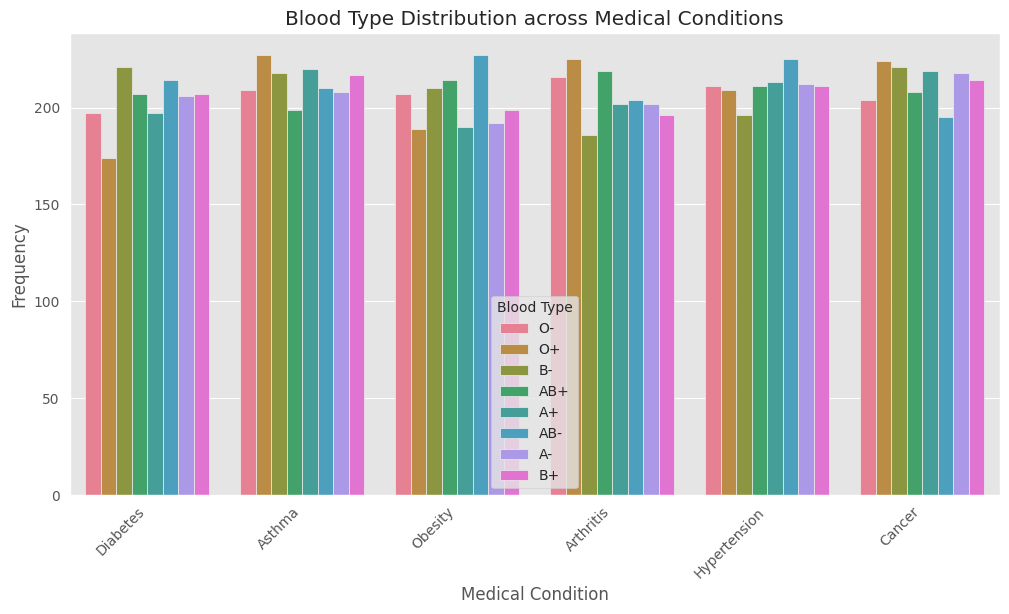

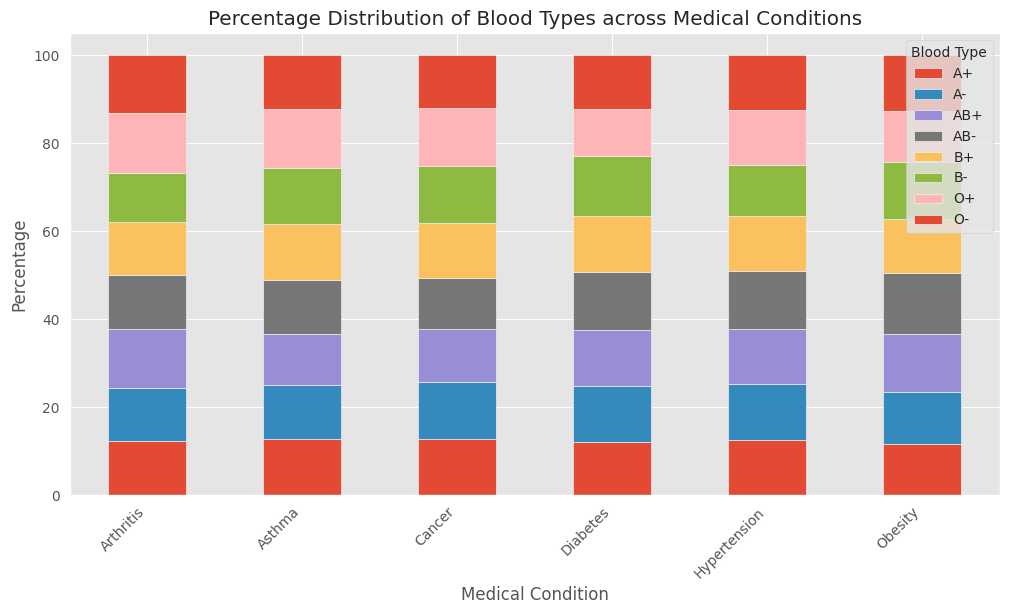

In [20]:
# prompt: Visualize the distribution of different blood types.
# Compare blood type distribution across different medical conditions.

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the overall distribution of blood types
plt.figure(figsize=(8, 6))
sns.countplot(x='Blood Type', data=df)
plt.title('Distribution of Blood Types')
plt.xlabel('Blood Type')
plt.ylabel('Frequency')
plt.show()

# Compare blood type distribution across different medical conditions
plt.figure(figsize=(12, 6))
sns.countplot(x='Medical Condition', hue='Blood Type', data=df)
plt.title('Blood Type Distribution across Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


# Calculate and visualize the percentage of each blood type for each medical condition
blood_type_percentages = df.groupby('Medical Condition')['Blood Type'].value_counts(normalize=True).unstack() * 100
blood_type_percentages.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Percentage Distribution of Blood Types across Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Blood Type')
plt.show()

In [21]:
# prompt: Use chi-square tests to determine if there are significant associations between blood type and medical conditions.

# Perform chi-square test for association between blood type and medical condition
chi2, p, dof, expected = chi2_contingency(blood_type_condition_crosstab)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant association between blood type and medical condition.")
else:
    print("There is no statistically significant association between blood type and medical condition.")

Chi-square statistic: 25.565876597152375
P-value: 0.8783682212400656
Degrees of freedom: 35
Expected frequencies:
 [[204.765  211.9628 211.3423 201.4143 209.4808 202.0348]
 [204.27   211.4504 210.8314 200.9274 208.9744 201.5464]
 [207.57   214.8664 214.2374 204.1734 212.3504 204.8024]
 [210.375  217.77   217.1325 206.9325 215.22   207.57  ]
 [205.26   212.4752 211.8532 201.9012 209.9872 202.5232]
 [206.58   213.8416 213.2156 203.1996 211.3376 203.8256]
 [205.92   213.1584 212.5344 202.5504 210.6624 203.1744]
 [205.26   212.4752 211.8532 201.9012 209.9872 202.5232]]
There is no statistically significant association between blood type and medical condition.


***BLOOD TYPE AND MEDICAL CONDITIONS ***

**Observations:**

* The distribution of blood types across different medical conditions appears
   relatively even. There isn't a single blood type that stands out as being significantly more or less prevalent for any particular condition.

* Some minor variations exist, but they don't appear to be substantial enough  
  to draw strong conclusions.

* The dataset likely represents a diverse population with a relatively balanced
  distribution of blood types.

  Insights:

* While some studies suggest potential links between blood type and certain
  health conditions, this data doesn't show a strong association between blood type and the specific conditions listed.

* Other factors, such as genetics, lifestyle, and environmental exposures,
  likely play a more significant role in determining susceptibility to these conditions.

* Blood type may still be a relevant factor in specific situations or for other
  conditions not included in this dataset.

Recommendations:

* Further investigation with a larger sample size and more detailed analysis    might be needed to uncover potential associations between blood type and these
 medical conditions.

* Consider blood type as one of the factors during diagnosis and treatment, but avoid overemphasizing its importance in isolation.

* Focus on comprehensive patient assessment, considering various risk factors and individual circumstances.

* Continue monitoring for potential emerging trends or associations between   blood type and health outcomes.

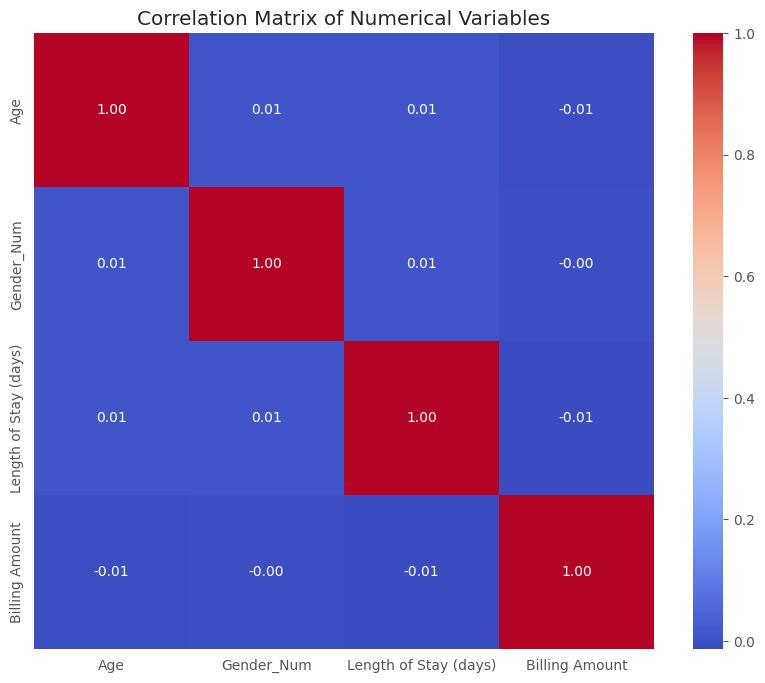

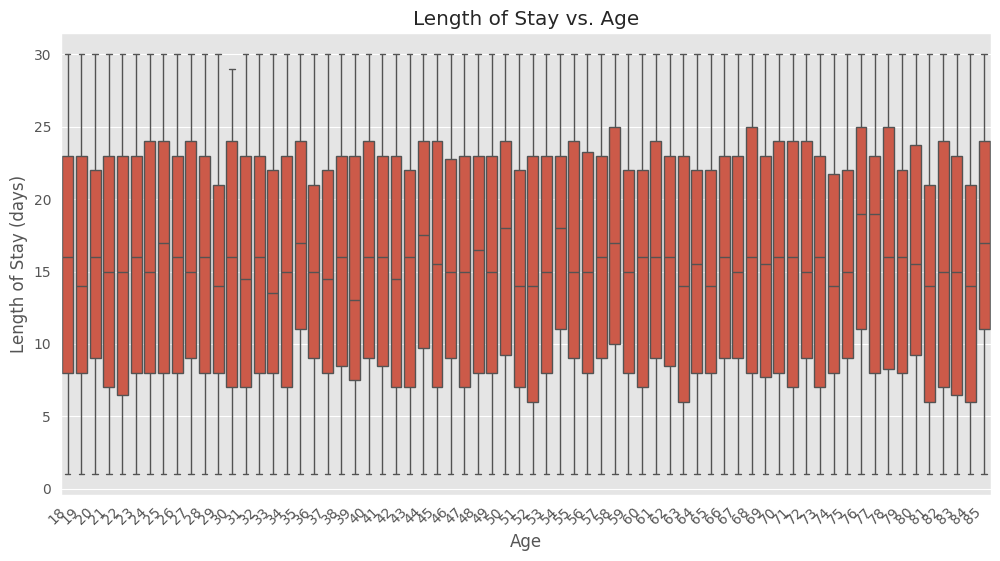


Analysis for Diabetes:
               Age              Date of Admission  Billing Amount  \
count  1623.000000                           1623     1623.000000   
mean     51.802218  2021-05-02 11:13:25.175600896    26060.116129   
min      18.000000            2018-11-02 00:00:00     1071.456127   
25%      35.000000            2020-02-18 12:00:00    14261.633315   
50%      53.000000            2021-04-21 00:00:00    26162.203250   
75%      69.000000            2022-07-14 12:00:00    38420.859485   
max      85.000000            2023-10-29 00:00:00    49954.968330   
std      19.765947                            NaN    14013.920497   

       Room Number                 Discharge Date  Length of Stay (days)  \
count  1623.000000                           1623            1623.000000   
mean    297.848429  2021-05-18 01:00:19.963031296              15.574245   
min     101.000000            2018-11-14 00:00:00               1.000000   
25%     199.000000            2020-03-07 00:00:00 

In [22]:
# Explore the correlation between age, gender, and blood type with other variables like length of stay, billing amount, and medical condition.

# Correlation analysis between age, gender, blood type, and other variables

# Convert gender to numerical representation for correlation analysis
df['Gender_Num'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Calculating Pearson correlation coefficients
correlation_columns = ['Age', 'Gender_Num', 'Length of Stay (days)', 'Billing Amount']  # Add other relevant columns
correlation_matrix = df[correlation_columns].corr()

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Further examples would involve using Cramer's V or Theil's U for more complex relationships

# Explore trends in length of stay for different age groups
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Length of Stay (days)', data=df)
plt.title('Length of Stay vs. Age')
plt.xlabel('Age')
plt.ylabel('Length of Stay (days)')
plt.xticks(rotation=45, ha='right')
plt.show()

# ... similar plots for billing amount vs age, length of stay vs gender, etc.

# Group data by medical condition and analyze other variables within each group
for condition in df['Medical Condition'].unique():
    condition_data = df[df['Medical Condition'] == condition]
    print(f"\nAnalysis for {condition}:")
    print(condition_data.describe())
    # Add further analyses (e.g., distributions, correlations) for each medical condition

# Additional statistical tests:
# - ANOVA (analysis of variance) to compare means across different groups (e.g., age groups, genders)
# - t-tests to compare means of two groups
# - Mann-Whitney U test or Kruskal-Wallis test for non-parametric comparisons if data isn't normally distributed

#MEDICAL INSIGHTS
1. Most Common Medical Conditions
2. Condition by Age/ Gender

Most Common Medical Conditions:
 Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64


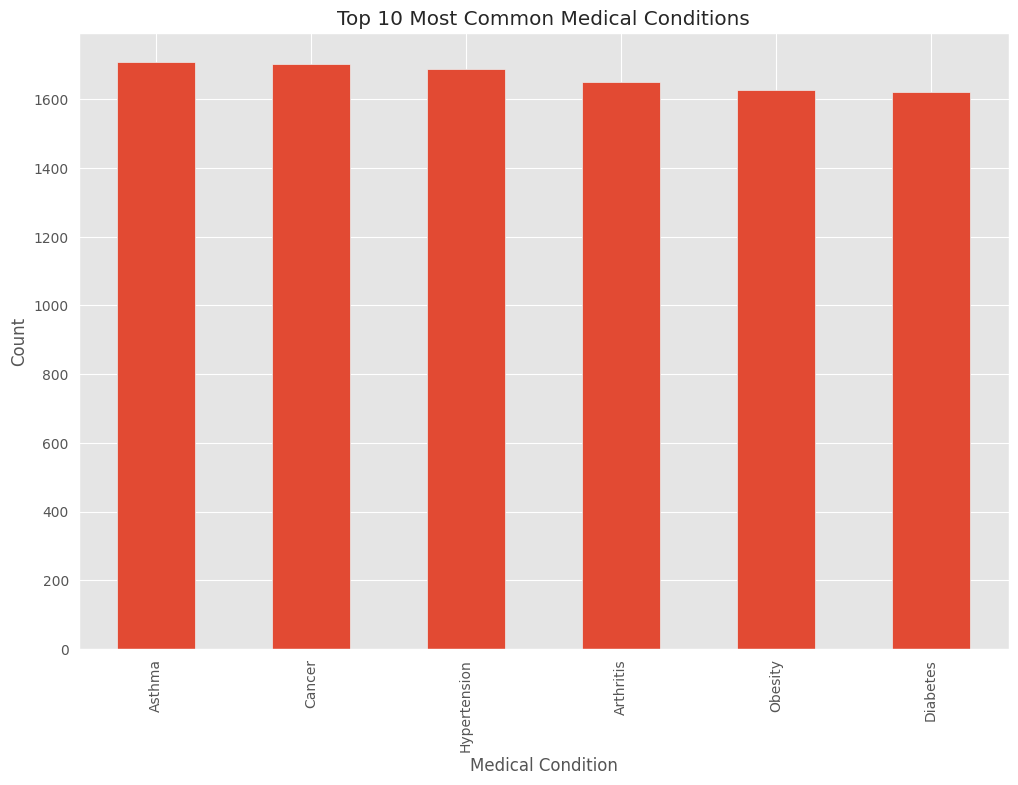

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Diabetes'),
  Text(1, 0, 'Asthma'),
  Text(2, 0, 'Obesity'),
  Text(3, 0, 'Arthritis'),
  Text(4, 0, 'Hypertension'),
  Text(5, 0, 'Cancer')])

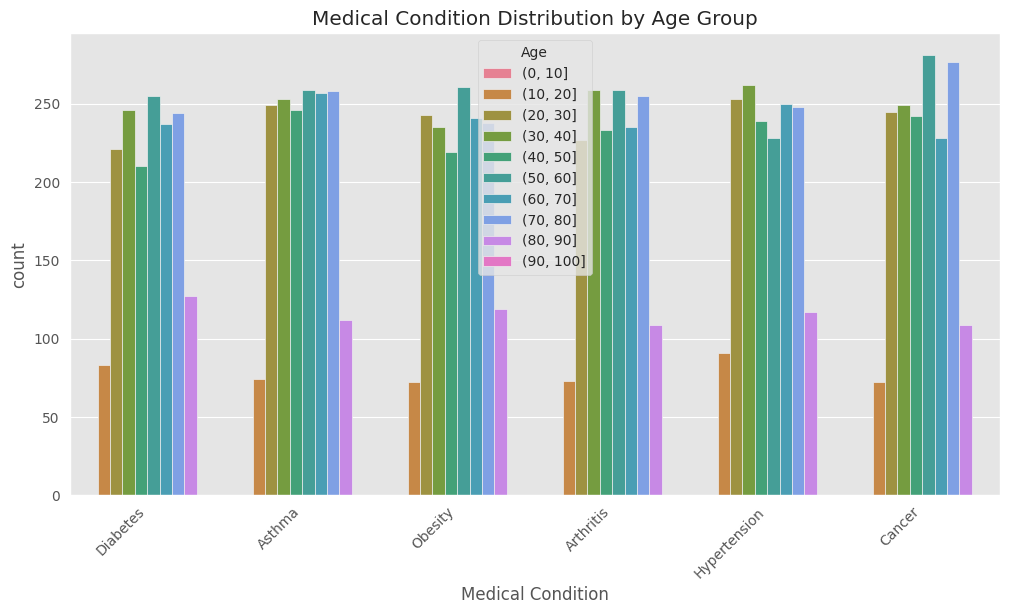

In [23]:
# Count the occurrences of each medical condition
condition_counts = df['Medical Condition'].value_counts()

# Display the most common conditions
print("Most Common Medical Conditions:\n", condition_counts.head(10))  # Adjust the number to show more/less

# Plot the top 10 most common conditions
condition_counts[:10].plot(kind='bar')
plt.title('Top 10 Most Common Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.show()

# Condition by Age
plt.figure(figsize=(12, 6))
sns.countplot(x='Medical Condition', hue=age_groups, data=df)  # Using age_groups from before
plt.title('Medical Condition Distribution by Age Group')
plt.xticks(rotation=45, ha='right')


Most Common Medical Conditions

Observation:


* Asthma, Cancer, and Hypertension are the three most prevalent conditions in
 the dataset.

* Arthritis, Obesity, and Diabetes are also common, but with slightly lower
 frequencies.

* These top conditions likely represent a significant portion of the healthcare
 burden and resource utilization within the patient population.

* The age distribution, as mentioned before, shows a higher concentration of
 patients in the 50-60 and 70-80 age groups.


Insights:

* The high prevalence of Asthma, Cancer, and Hypertension suggests a need for
  specialized resources and expertise in managing these conditions.

* These conditions are known to have varying prevalence rates across different
 age groups. Cancer, for example, is more common in older adults, while Asthma can affect people of all ages but is often diagnosed in childhood.

* By considering the age distribution alongside condition prevalence, we can develop more targeted and effective healthcare strategies.

Recommendations:

* Resource Allocation: Prioritize resource allocation to departments and
 specialties focused on managing Asthma, Cancer, and Hypertension. This includes staffing, equipment, and facilities.

* Age-Specific Strategies: Develop age-specific prevention and treatment
 programs for these conditions. For example, cancer screening initiatives might be more focused on older adults, while Asthma management programs might target both children and adults.

* Public Health Initiatives: Launch public awareness campaigns to educate the
 population about these conditions, risk factors, and early detection
 strategies. Tailor messaging to different age groups as appropriate.

* Research and Development: Invest in research to develop new and improved treatments for these conditions, especially those with higher prevalence in specific age groups.

* Data-Driven Decision Making: Continuously monitor the prevalence of these    conditions and their distribution across age groups to inform resource allocation and healthcare planning decisions.

# ADMISSION INSIGHTS
1. Admission Type Distribution
2. Admission Leength
3. Admission by Hospital

Admission Type Distribution:
 Admission Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64


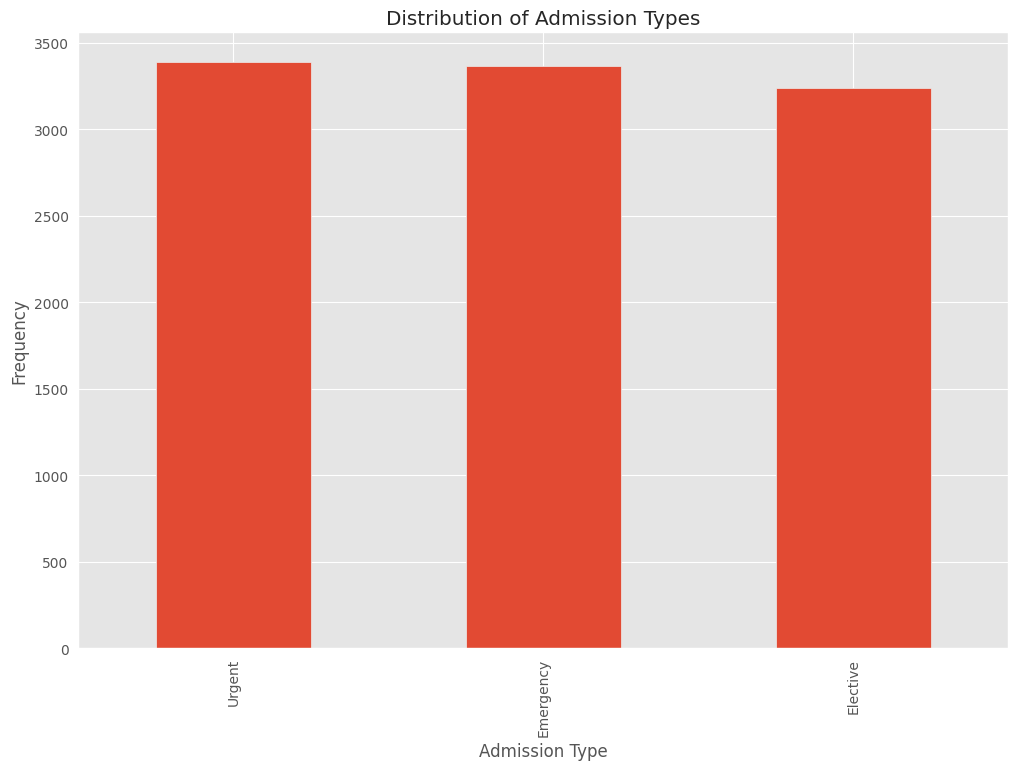

Average Length of Stay by Condition and Admission Type:
    Medical Condition Admission Type  Length of Stay (days)
0          Arthritis       Elective              16.583480
1          Arthritis      Emergency              15.984877
2          Arthritis         Urgent              15.384058
3             Asthma       Elective              15.270175
4             Asthma      Emergency              15.597122
5             Asthma         Urgent              15.577320
6             Cancer       Elective              15.571171
7             Cancer      Emergency              15.259516
8             Cancer         Urgent              15.614035
9           Diabetes       Elective              15.392045
10          Diabetes      Emergency              15.682226
11          Diabetes         Urgent              15.641264
12      Hypertension       Elective              15.644660
13      Hypertension      Emergency              15.686851
14      Hypertension         Urgent              14.994958

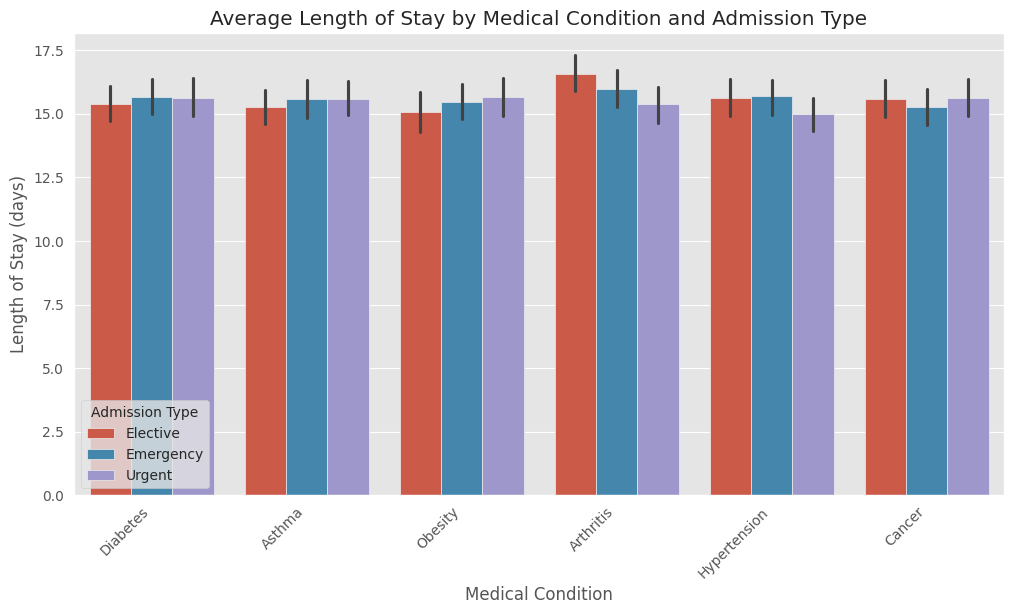

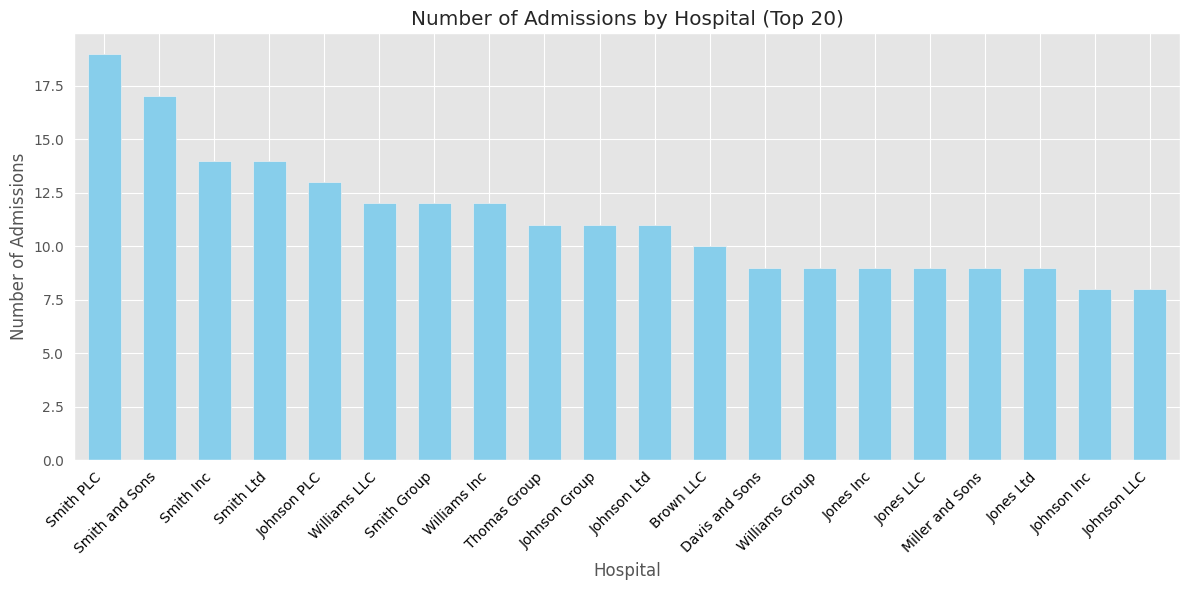

Hospital Specialization (Cross-tabulation):
 Medical Condition            Arthritis  Asthma  Cancer  Diabetes  \
Hospital                                                           
Abbott Inc                           1       0       0         0   
Abbott LLC                           1       0       0         0   
Abbott PLC                           1       0       0         0   
Abbott, Curry and Moore              0       1       0         0   
Abbott-Jordan                        0       0       0         0   
...                                ...     ...     ...       ...   
Zimmerman, Salinas and Hill          0       0       1         0   
Zuniga Ltd                           0       1       0         0   
Zuniga, Taylor and Scott             0       1       0         0   
Zuniga-Chandler                      0       0       0         0   
Zuniga-Johnson                       0       0       0         0   

Medical Condition            Hypertension  Obesity  
Hospital         

In [24]:
  # Admission Type Distribution
admission_type_counts = df['Admission Type'].value_counts()
print("Admission Type Distribution:\n", admission_type_counts)

   # Visualize the distribution
admission_type_counts.plot(kind='bar')
plt.title('Distribution of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Frequency')
plt.show()

   # Calculate average length of stay per medical condition and admission type
avg_los_by_condition_type = df.groupby(['Medical Condition', 'Admission Type'])['Length of Stay (days)'].mean().reset_index()
print("Average Length of Stay by Condition and Admission Type:\n", avg_los_by_condition_type)

   # Visualize the average length of stay for different medical conditions
plt.figure(figsize=(12, 6))
sns.barplot(x='Medical Condition', y='Length of Stay (days)', hue='Admission Type', data=df)
plt.title('Average Length of Stay by Medical Condition and Admission Type')
plt.xticks(rotation=45, ha='right')
plt.show()

 # Analyze admissions by hospital (top 20)
top_hospitals = df['Hospital'].value_counts().nlargest(20).index  # Get top 20 hospitals
admissions_by_hospital = df[df['Hospital'].isin(top_hospitals)]['Hospital'].value_counts()

   # Visualize admissions by hospital (top 20)
plt.figure(figsize=(12, 6))
admissions_by_hospital.plot(kind='bar', width=0.6, color='skyblue')
plt.title('Number of Admissions by Hospital (Top 20)')
plt.xlabel('Hospital')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45, ha='right', color='black', fontsize=10)
plt.tight_layout()
plt.show()

   # Analyze hospital specialization (example)
hospital_condition_crosstab = pd.crosstab(df['Hospital'], df['Medical Condition'])
print("Hospital Specialization (Cross-tabulation):\n", hospital_condition_crosstab)

   # You can further analyze this cross-tabulation to identify potential specializations
   # by looking for hospitals with a high proportion of admissions for specific conditions.

# BILLING & COST ANALYSIS
1. Billing Amount by Condition
2. Insurance Provider Distribution
3. Cost Per Admission Type

Observations:

* Admission Type: Urgent, Emergency, and Elective admissions are relatively evenly distributed, indicating a diverse patient population and healthcare needs.

* Average Length of Stay: The average length of stay is relatively consistent across different medical conditions and admission types, with some slight variations.

* Elective Admissions: Tend to have a slightly longer average length of stay for Arthritis, suggesting more planned procedures or complex cases.

* Emergency Admissions: Show slightly shorter average lengths of stay for some conditions, potentially indicating quicker stabilization and discharge for urgent cases.

Insights:

* The relatively balanced distribution of admission types reflects the hospital's ability to handle a variety of patient needs and acuity levels.
The consistent average length of stay suggests efficient treatment protocols and resource allocation, regardless of admission type.

* Slight variations in length of stay might be attributed to factors like patient complexity, treatment requirements, and discharge planning processes.

Recommendations:

* Resource Allocation: Ensure adequate staffing, equipment, and bed capacity to manage the diverse admission types and patient needs.

* Patient Flow Optimization: Implement strategies to reduce wait times and improve patient flow, especially for emergency and urgent admissions.

* Discharge Planning: Enhance discharge planning processes to ensure smooth transitions and minimize unnecessary delays in hospital stays.

* Performance Monitoring: Continuously monitor average length of stay by condition and admission type to identify potential areas for improvement.

* Data-Driven Decision Making: Utilize data analytics to predict patient demand, optimize resource allocation, and improve operational efficiency.



Observations:

* Overall Consistency: The average length of stay is relatively consistent across most medical conditions and admission types, hovering around 15-16 days.

* Arthritis: Elective admissions for Arthritis have a slightly longer average length of stay compared to emergency or urgent admissions, possibly due to planned procedures or more complex cases.

* Hypertension: Urgent admissions for Hypertension have a slightly shorter average length of stay compared to elective or emergency, potentially indicating quicker stabilization and discharge.

* Other Conditions: Asthma, Cancer, and Diabetes show minimal variation in average length of stay across different admission types, suggesting a standardized approach to treatment.

Insights:

The consistent average length of stay across most conditions and admission types suggests efficient treatment protocols and resource allocation.

* Variations for Arthritis and Hypertension could be attributed to factors like patient complexity, treatment intensity, or discharge planning processes specific to those conditions.

* The data indicates a relatively standardized approach to care for Asthma, Cancer, and Diabetes, regardless of how the patient is admitted.
Recommendations:

* Performance Benchmarking: Compare the hospital's average length of stay to industry benchmarks and identify potential areas for improvement.

* Clinical Pathway Optimization: Develop standardized clinical pathways for common conditions to further streamline care and reduce variations in length of stay.

* Discharge Planning: Enhance discharge planning processes to ensure timely and appropriate transitions for patients, especially for conditions with longer average stays.

* Resource Allocation: Allocate resources based on patient needs and the average length of stay for different conditions and admission types.

* Data-Driven Decision Making: Utilize data analytics to identify trends, anomalies, and opportunities to optimize length of stay without compromising patient outcomes.




Observations:

* Diverse Specialization: The cross-tabulation shows that hospitals tend to have varying degrees of specialization in different medical conditions.

* Some hospitals might have a higher number of admissions for specific conditions, suggesting a focus on those areas.

* Common Conditions: Conditions like Asthma, Cancer, and Hypertension appear to be relatively common across multiple hospitals, indicating a widespread need for managing these conditions.

* Specialized Centers: Some hospitals might show a clear focus on particular conditions, such as those with a high number of Arthritis or Obesity cases.

* General Hospitals: Many hospitals likely provide a broader range of services, handling a mix of different medical conditions.

Insights:

* Hospital specialization can help optimize resource allocation and expertise, allowing hospitals to focus on areas where they excel.

* Understanding hospital specialization can aid in patient referrals and ensuring patients receive care at facilities best equipped to manage their specific conditions.

* Collaboration between hospitals with different specializations can enhance the overall healthcare ecosystem and improve patient access to specialized care.


Recommendations:

* Identify Specializations: Further analyze the cross-tabulation to identify hospitals with clear specializations in particular conditions. This can be done by calculating proportions or using visualization techniques.

* Referral Networks: Develop referral networks between hospitals based on their specializations to facilitate appropriate patient placement and access to specialized care.

* Resource Allocation: Allocate resources strategically to support hospital specializations and ensure the availability of necessary equipment, expertise, and staffing.

* Collaboration and Knowledge Sharing: Encourage collaboration between hospitals with similar specializations to share best practices, research findings, and innovative approaches.

* Data-Driven Decision Making: Utilize data analytics to track hospital specialization trends, identify areas for improvement, and inform healthcare planning decisions.

Additional Considerations:

* Patient Preferences: Consider patient preferences and geographic accessibility when making referral decisions, even within specialized networks.

* Quality Metrics: Monitor quality metrics and patient outcomes for different conditions across hospitals to ensure consistent standards of care.

* Cost-Effectiveness: Analyze the cost-effectiveness of specialized care versus general care for different conditions to optimize resource utilization.

* Technology Integration: Explore technologies that can support telehealth, remote consultations, and virtual care to enhance access to specialized expertise.

Average Billing Amount by Medical Condition:
   Medical Condition  Billing Amount
0         Arthritis    25187.631255
1            Asthma    25416.869895
2            Cancer    25539.096133
3          Diabetes    26060.116129
4      Hypertension    25198.033973
5           Obesity    25720.842683


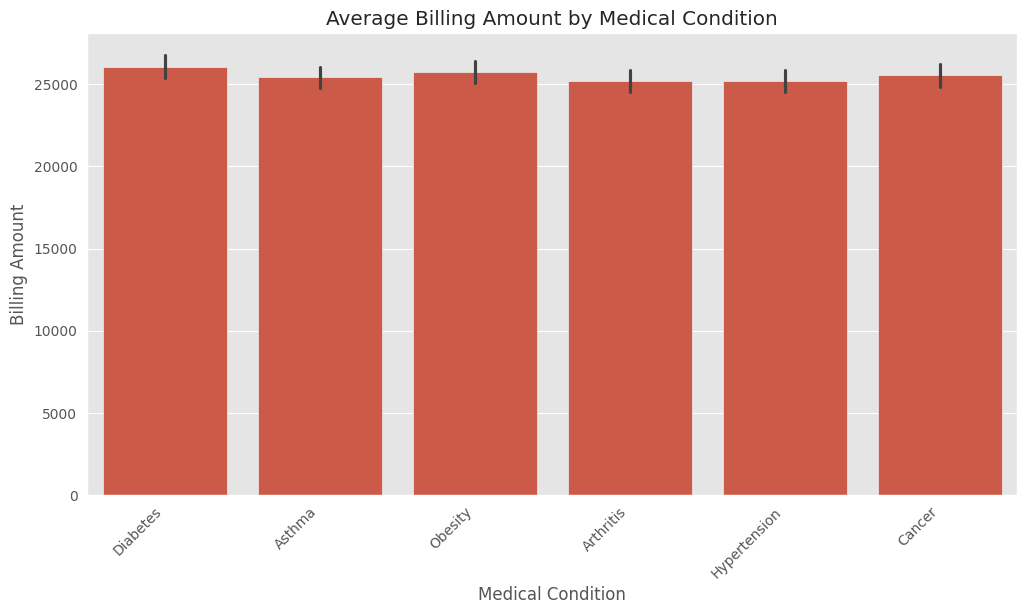

Insurance Provider Distribution:
 Insurance Provider
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: count, dtype: int64


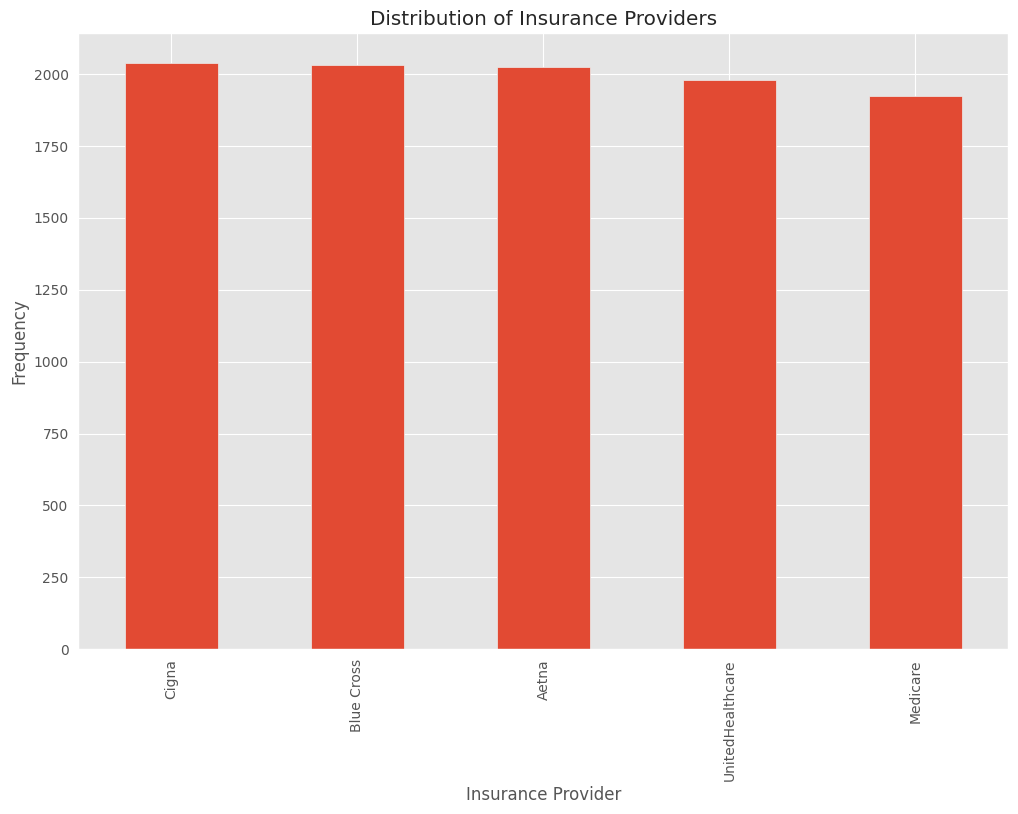

Average Billing Amount by Insurance Provider:
   Insurance Provider  Billing Amount
0              Aetna    25837.923338
1         Blue Cross    25652.489617
2              Cigna    25656.946859
3           Medicare    25002.480429
4   UnitedHealthcare    25404.685388


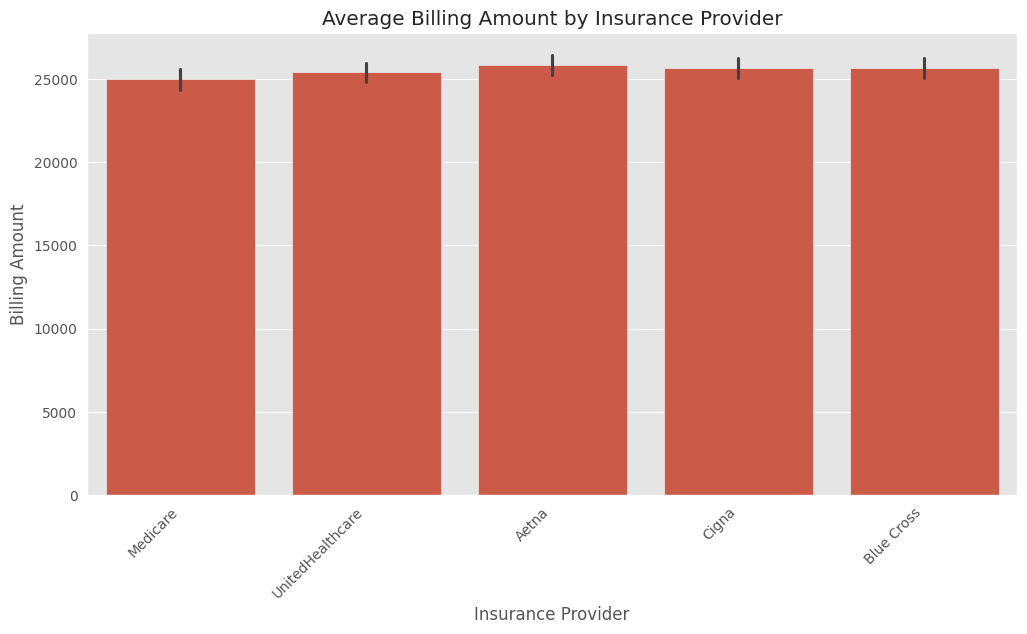

Cost per Admission Type:
      Admission Type                      Hospital Medical Condition  \
0          Elective                    Abbott Inc         Arthritis   
1          Elective                    Abbott LLC         Arthritis   
2          Elective       Abbott, Curry and Moore            Asthma   
3          Elective                    Acosta PLC         Arthritis   
4          Elective  Acosta, Thompson and Schultz            Cancer   
...             ...                           ...               ...   
9840         Urgent          Yu, Garcia and Jones          Diabetes   
9841         Urgent               Zamora-Davidson            Cancer   
9842         Urgent     Zhang, Peterson and Yoder         Arthritis   
9843         Urgent  Zimmerman, Gibson and Hansen      Hypertension   
9844         Urgent               Zuniga-Chandler      Hypertension   

      Billing Amount  
0       32114.205150  
1       10269.930800  
2       11869.283650  
3       20768.155120  
4     

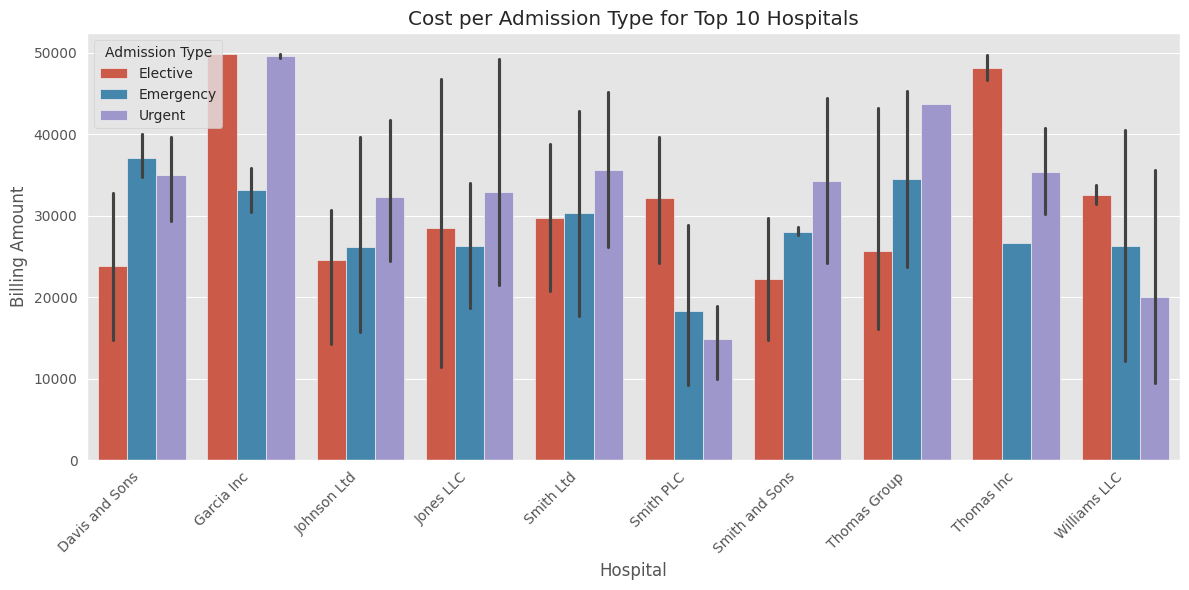

In [25]:
# Calculate average billing amount for different medical conditions
avg_billing_by_condition = df.groupby('Medical Condition')['Billing Amount'].mean().reset_index()
print("Average Billing Amount by Medical Condition:\n", avg_billing_by_condition)

   # Visualize the average billing amount for different medical conditions
plt.figure(figsize=(12, 6))
sns.barplot(x='Medical Condition', y='Billing Amount', data=df)
plt.title('Average Billing Amount by Medical Condition')
plt.xticks(rotation=45, ha='right')
plt.show()

   # You can further analyze the variance using descriptive statistics or box plots.


   # Insurance Provider Distribution
insurance_provider_counts = df['Insurance Provider'].value_counts()
print("Insurance Provider Distribution:\n", insurance_provider_counts)

   # Visualize the distribution
insurance_provider_counts.plot(kind='bar')
plt.title('Distribution of Insurance Providers')
plt.xlabel('Insurance Provider')
plt.ylabel('Frequency')
plt.show()

   # Compare average billing amounts by insurance provider
avg_billing_by_provider = df.groupby('Insurance Provider')['Billing Amount'].mean().reset_index()
print("Average Billing Amount by Insurance Provider:\n", avg_billing_by_provider)

   # Visualize the comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Insurance Provider', y='Billing Amount', data=df)
plt.title('Average Billing Amount by Insurance Provider')
plt.xticks(rotation=45, ha='right')
plt.show()



# Compare cost of emergency vs. elective admissions
cost_by_admission_type = df.groupby(['Admission Type', 'Hospital', 'Medical Condition'])['Billing Amount'].mean().reset_index()
print("Cost per Admission Type:\n", cost_by_admission_type)


# Select top N hospitals based on total billing amount
N = 10  # Number of top hospitals to select
top_hospitals = cost_by_admission_type.groupby('Hospital')['Billing Amount'].sum().nlargest(N).index

# Filter data to include only top hospitals
filtered_data = cost_by_admission_type[cost_by_admission_type['Hospital'].isin(top_hospitals)]

# Visualize the data for top hospitals
plt.figure(figsize=(12, 6))
sns.barplot(x='Hospital', y='Billing Amount', hue='Admission Type', data=filtered_data)
plt.title(f'Cost per Admission Type for Top {N} Hospitals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




#    # Visualize the comparison (example for a specific hospital)
# hospital_name = 'City Hospital'  # Replace with the desired hospital
# filtered_data = cost_by_admission_type[cost_by_admission_type['Hospital'] == hospital_name]
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Medical Condition', y='Billing Amount', hue='Admission Type', data=filtered_data)
# plt.title(f'Cost per Admission Type at {hospital_name}')
# plt.xticks(rotation=45, ha='right')
# plt.show()

   # You can create similar visualizations for other hospitals or conditions.

Observations:

* Average Billing Amount by Condition: The average billing amount is relatively consistent across different medical conditions, hovering around $25,000-$$25,000-$26,000. Diabetes has a slightly higher average billing amount, potentially due to longer-term management or complications.

* Insurance Provider Distribution: Cigna, Blue Cross, Aetna, UnitedHealthcare, and Medicare are the major insurance providers, with a relatively even distribution of patients among them.

* Average Billing Amount by Insurance Provider: The average billing amount is also relatively similar across different insurance providers, suggesting comparable reimbursement rates and coverage policies. Aetna has a slightly higher average billing amount.
Cost per Admission Type: The provided data snippet is incomplete, but it indicates that the cost per admission type can vary depending on the hospital, admission type, and medical condition.

Insights:

* The consistent billing amounts across conditions and insurance providers suggest a standardized approach to pricing and reimbursement in the healthcare system.

* Slight variations might be attributed to factors like the complexity of treatment, length of stay, or specific procedures required for certain conditions or by certain providers.

* Analyzing the cost per admission type can provide insights into the financial implications of different healthcare pathways and resource utilization patterns.


Recommendations:

* Cost-Effective Treatments: Identify cost-effective treatment options for different medical conditions to optimize resource utilization and minimize financial burden on patients and the healthcare system.

* Insurance Negotiation: Negotiate favorable reimbursement rates with insurance providers to ensure financial sustainability and equitable access to care.

* Patient Financial Assistance: Offer financial assistance programs to patients who struggle to afford healthcare costs, especially for conditions with higher average billing amounts.

* Data-Driven Decision Making: Utilize data analytics to identify trends in healthcare costs and identify areas for cost reduction or negotiation with providers.

* Transparency: Provide clear and transparent information to patients about billing practices and costs associated with different treatment options.

Additional Considerations:

* Value-Based Care: Explore value-based reimbursement models that incentivize quality and efficiency in healthcare delivery.

* Cost Transparency Initiatives: Support initiatives that promote transparency in healthcare pricing to empower patients and drive competition among providers.

* Preventive Care: Emphasize preventive care measures to reduce the incidence of costly chronic conditions.
Data Analytics: Use data analytics to identify patterns in billing and cost data to optimize resource allocation and improve financial performance.

# TREATMENT OUTCOMES
1. Medication Usage
2. Test Result Trends


Medication Usage by Condition:
    Medical Condition   Medication  Count
0          Arthritis      Aspirin    322
1          Arthritis    Ibuprofen    320
2          Arthritis      Lipitor    318
3          Arthritis  Paracetamol    324
4          Arthritis   Penicillin    366
5             Asthma      Aspirin    370
6             Asthma    Ibuprofen    340
7             Asthma      Lipitor    346
8             Asthma  Paracetamol    310
9             Asthma   Penicillin    342
10            Cancer      Aspirin    291
11            Cancer    Ibuprofen    352
12            Cancer      Lipitor    350
13            Cancer  Paracetamol    346
14            Cancer   Penicillin    364
15          Diabetes      Aspirin    335
16          Diabetes    Ibuprofen    301
17          Diabetes      Lipitor    326
18          Diabetes  Paracetamol    327
19          Diabetes   Penicillin    334
20      Hypertension      Aspirin    328
21      Hypertension    Ibuprofen    335
22      Hypertension     

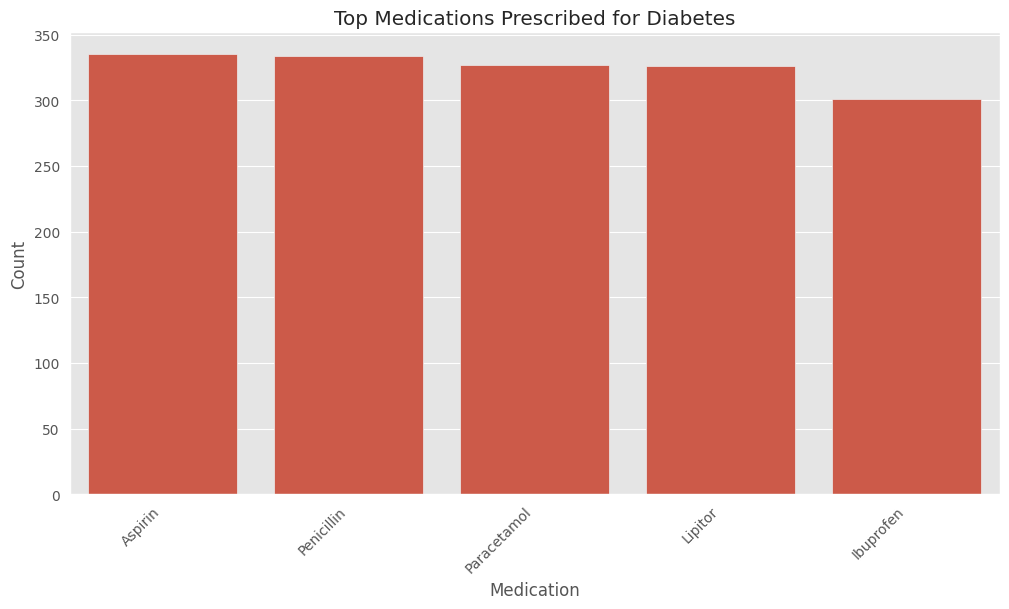

Test Results Trends:
    Medical Condition   Medication  Test Results  Count
0          Arthritis      Aspirin      Abnormal    108
1          Arthritis      Aspirin  Inconclusive    100
2          Arthritis      Aspirin        Normal    114
3          Arthritis    Ibuprofen      Abnormal    101
4          Arthritis    Ibuprofen  Inconclusive     96
..               ...          ...           ...    ...
85           Obesity  Paracetamol  Inconclusive     97
86           Obesity  Paracetamol        Normal    113
87           Obesity   Penicillin      Abnormal    107
88           Obesity   Penicillin  Inconclusive    103
89           Obesity   Penicillin        Normal    117

[90 rows x 4 columns]


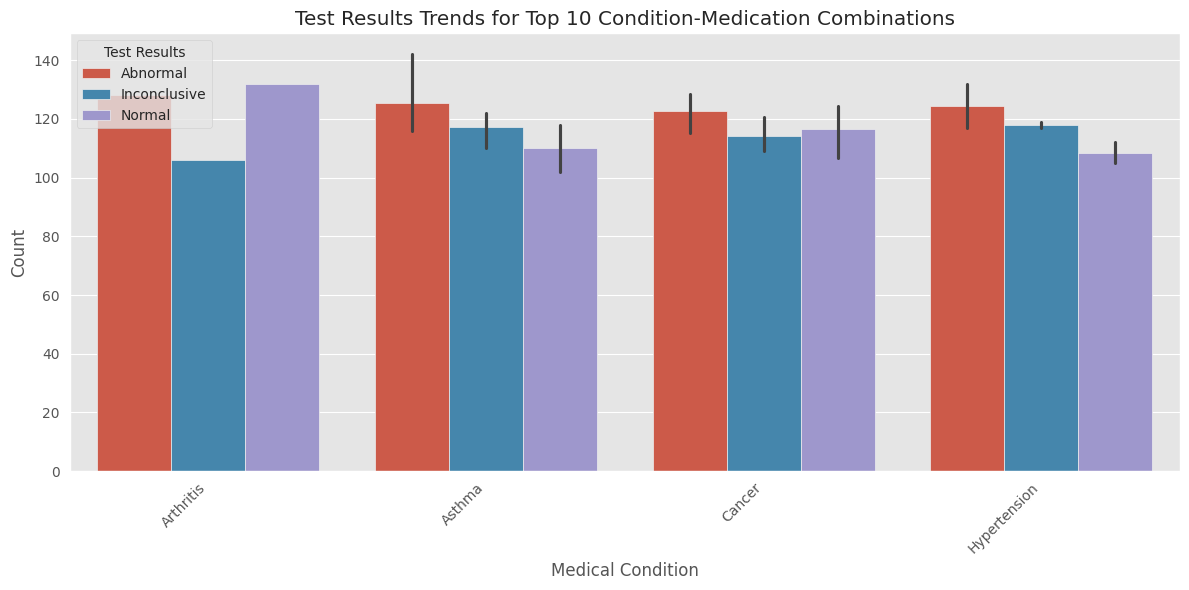

In [26]:
   # Identify most commonly prescribed medications for various conditions
medication_by_condition = df.groupby(['Medical Condition', 'Medication'])['Name'].count().reset_index()
medication_by_condition = medication_by_condition.rename(columns={'Name': 'Count'})
print("Medication Usage by Condition:\n", medication_by_condition)

   # Visualize the top medications for a specific condition (example)
condition_name = 'Diabetes'  # Replace with the desired condition
filtered_data = medication_by_condition[medication_by_condition['Medical Condition'] == condition_name]
filtered_data = filtered_data.sort_values(by=['Count'], ascending=False).head(10)  # Top 10 medications
plt.figure(figsize=(12, 6))
sns.barplot(x='Medication', y='Count', data=filtered_data)
plt.title(f'Top Medications Prescribed for {condition_name}')
plt.xticks(rotation=45, ha='right')
plt.show()

   # You can create similar visualizations for other conditions.


# Examine patterns in test results across different conditions and medications
test_results_by_condition_medication = df.groupby(['Medical Condition', 'Medication', 'Test Results'])['Name'].count().reset_index()
test_results_by_condition_medication = test_results_by_condition_medication.rename(columns={'Name': 'Count'})
print("Test Results Trends:\n", test_results_by_condition_medication)

# # Visualize test results for a specific condition and medication (example)
# condition_name = 'Diabetes'  # Replace with the desired condition
# medication_name = 'Insulin Therapy'  # Replace with the desired medication (from 'Medication' column)
# filtered_data = test_results_by_condition_medication[
#     (test_results_by_condition_medication['Medical Condition'] == condition_name) &
#     (test_results_by_condition_medication['Medication'] == medication_name)
# ]
# plt.figure(figsize=(8, 6))
# sns.barplot(x='Test Results', y='Count', data=filtered_data)
# plt.title(f'Test Results for {condition_name} with {medication_name}')
# plt.show()

   # You can create similar visualizations for other conditions and treatments.


# Select top N medical condition and medication combinations based on count
N = 10  # Number of top combinations to select
top_combinations = test_results_by_condition_medication.groupby(['Medical Condition', 'Medication'])['Count'].sum().nlargest(N).index

# Filter data to include only top combinations
filtered_data = test_results_by_condition_medication[
    test_results_by_condition_medication[['Medical Condition', 'Medication']].apply(tuple, axis=1).isin(top_combinations)
]

# Visualize the data for top combinations
plt.figure(figsize=(12, 6))
sns.barplot(x='Medical Condition', y='Count', hue='Test Results', data=filtered_data)
plt.title(f'Test Results Trends for Top {N} Condition-Medication Combinations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your previous code) ...

# Examine patterns in test results across different conditions and medications
test_results_by_condition_medication = df.groupby(['Medical Condition', 'Medication', 'Test Results'])['Name'].count().reset_index()
test_results_by_condition_medication = test_results_by_condition_medication.rename(columns={'Name': 'Count'})
print("Test Results Trends:\n", test_results_by_condition_medication)

# ... (Your previous code) ...

medication_name = "Insulin"  # Replace with the actual medication name found in your data

filtered_data = test_results_by_condition_medication[
    (test_results_by_condition_medication['Medical Condition'] == condition_name) &
    (test_results_by_condition_medication['Medication'] == medication_name)
]

# ... (Rest of your code) ...

# Check if filtered_data is empty
if filtered_data.empty:
    print(f"WARNING: No data found for {condition_name} with {medication_name}. Plot will be blank.")
else:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Test Results', y='Count', data=filtered_data)
    plt.title(f'Test Results for {condition_name} with {medication_name}')
    plt.show()

# ... (Rest of your code) ...

Test Results Trends:
    Medical Condition   Medication  Test Results  Count
0          Arthritis      Aspirin      Abnormal    108
1          Arthritis      Aspirin  Inconclusive    100
2          Arthritis      Aspirin        Normal    114
3          Arthritis    Ibuprofen      Abnormal    101
4          Arthritis    Ibuprofen  Inconclusive     96
..               ...          ...           ...    ...
85           Obesity  Paracetamol  Inconclusive     97
86           Obesity  Paracetamol        Normal    113
87           Obesity   Penicillin      Abnormal    107
88           Obesity   Penicillin  Inconclusive    103
89           Obesity   Penicillin        Normal    117

[90 rows x 4 columns]


Observations:

* Varied Test Results: Test results vary across different medical conditions and medications, with a mix of normal, abnormal, and inconclusive outcomes.

* Abnormal Results: Conditions like Arthritis and Hypertension seem to have a higher proportion of abnormal test results, indicating potential disease progression or complications.

* Inconclusive Results: Inconclusive results are also prevalent for certain conditions and medications, suggesting the need for further investigation or more specific tests.

* Normal Results: Some conditions and medications show a higher proportion of normal test results, indicating effective treatment or disease management.

Insights:

* The variability in test results highlights the complexity of medical conditions and the need for personalized treatment approaches.

* Abnormal test results can prompt further investigation, treatment adjustments, or closer monitoring of patients.

Inconclusive results often necessitate additional tests or specialist consultations to reach a definitive diagnosis or treatment plan.

* Normal test results can provide reassurance to patients and healthcare providers, indicating effective disease management or successful treatment outcomes.

Recommendations:

* Monitoring and Follow-up: Establish regular follow-up appointments for patients with abnormal or inconclusive test results to monitor their condition, adjust treatment plans as needed, and ensure timely interventions.

* Test Result Interpretation: Develop standardized guidelines for interpreting test results to ensure consistency and accuracy in diagnosis and treatment decisions.

* Quality Control: Implement quality control measures in laboratory testing to minimize errors and ensure reliable test results.

Patient Education: Provide clear and concise explanations to patients about their test results, potential implications, and next steps in their care plan.

* Data-Driven Insights: Utilize data analytics to identify trends in test results, track patient progress, and evaluate the effectiveness of different treatment approaches.

Additional Considerations:

* Patient Demographics and Comorbidities: Consider patient demographics, comorbidities, and lifestyle factors when interpreting test results and making treatment decisions.

* Medication Side Effects: Monitor for potential medication side effects that might contribute to abnormal test results and adjust treatment plans accordingly.

* Disease Progression: Track test results over time to assess disease progression and response to treatment, especially for chronic conditions.

* Research and Development: Invest in research to develop more accurate and reliable diagnostic tests for various medical conditions.

# HOSPITAL SPESIFIC INSIGHT
1. Hospital Performance
2. Room Utilization

Room Utilization:
      Room Number  count
0            358     44
1            230     40
2            257     38
3            469     37
4            195     36
..           ...    ...
395          160     14
396          306     14
397          321     14
398          373     14
399          352     10

[400 rows x 2 columns]
Hospital Performance:
                          Hospital  Billing Amount  Length of Stay (days)
0                      Abbott Inc     32114.20515                   30.0
1                      Abbott LLC     10497.36250                   13.5
2                      Abbott PLC     31786.83098                    4.0
3         Abbott, Curry and Moore     11869.28365                   14.0
4                   Abbott-Jordan     25326.80555                   28.0
...                           ...             ...                    ...
8634  Zimmerman, Salinas and Hill     44147.79355                   27.0
8635                   Zuniga Ltd     25298.39650             

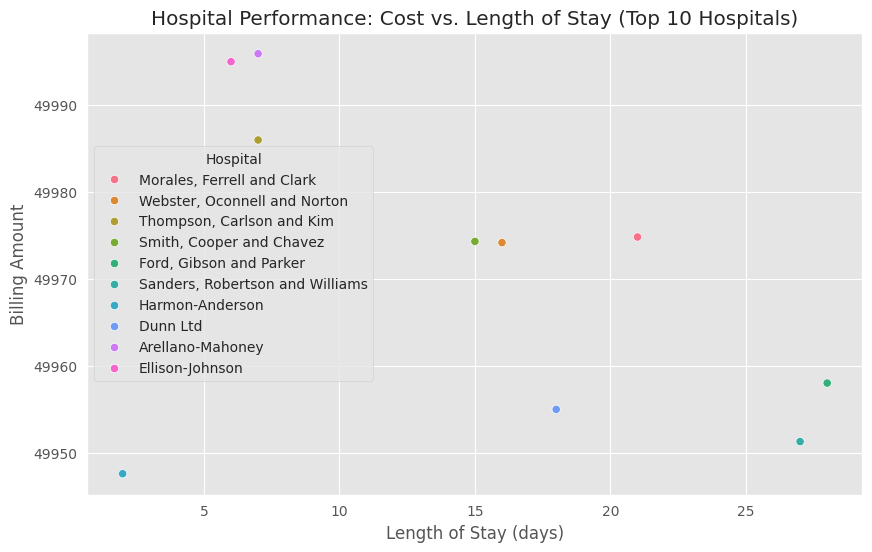

In [28]:
# investigate room utilization
room_utilization = df['Room Number'].value_counts().reset_index()
print("Room Utilization:\n", room_utilization)

# Compare hospitals based on average patient costs, length of stay, and outcomes
hospital_performance = df.groupby('Hospital')[['Billing Amount', 'Length of Stay (days)']].mean().reset_index()
print("Hospital Performance:\n", hospital_performance)

# You can further analyze outcomes by including relevant outcome variables (e.g., discharge status)
# and using appropriate statistical tests or visualizations.

# Visualize hospital performance (example: average cost vs. length of stay)
plt.figure(figsize=(10, 6))

# Select top 10 hospitals by Billing Amount for visualization
top_hospitals = hospital_performance.sort_values(by=['Billing Amount'], ascending=False).head(10)['Hospital'].tolist()
filtered_df = df[df['Hospital'].isin(top_hospitals)]

sns.scatterplot(x='Length of Stay (days)', y='Billing Amount', hue='Hospital', data=filtered_df)  # Use filtered_df here
plt.title('Hospital Performance: Cost vs. Length of Stay (Top 10 Hospitals)')
plt.show()

# You can create other visualizations to compare hospitals based on different metrics.

Observations:

* Room Utilization: Some rooms (e.g., 358, 230) have significantly higher utilization than others, indicating potential capacity constraints or uneven patient flow.

* Hospital Performance: Billing amounts and lengths of stay vary considerably across different hospitals, suggesting differences in treatment complexity, pricing strategies, and efficiency.

Insights:

* Room Utilization: High-utilization rooms might require closer monitoring or capacity expansion to ensure patient access and efficient resource allocation. Low-utilization rooms might indicate underutilization or potential for repurposing.

* Hospital Performance: Variations in billing amounts and lengths of stay could be attributed to factors like patient demographics, case mix, specialization, and operational efficiency.

Recommendations:

Room Utilization Optimization:

* Analyze room utilization patterns to identify bottlenecks and opportunities for improvement.

* Implement strategies to balance room usage, such as adjusting bed assignments or optimizing patient flow processes.

* Consider capacity planning for high-demand rooms to ensure sufficient availability.

Hospital Performance Improvement:

* Benchmark hospital performance against industry standards to identify areas for improvement in cost and efficiency.

* Analyze factors contributing to variations in billing amounts and lengths of stay, such as treatment protocols and discharge planning processes.

* Implement strategies to reduce unnecessary costs and lengths of stay without compromising patient outcomes.

Additional Considerations:

* Patient Flow: Analyze patient flow throughout the hospital to identify potential delays or inefficiencies.

* Staffing Levels: Ensure adequate staffing levels to support patient care and room turnover.

* Technology Integration: Explore technologies that can support bed management, patient tracking, and discharge planning.

* Quality of Care: Monitor patient outcomes and satisfaction to ensure high-quality care delivery.

* Financial Sustainability: Analyze the financial implications of room utilization and hospital performance to ensure long-term viability.